# Decodificando la mesa

Decodificando la cinta de toda una mesa "ideal"

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import cv2

from encodingDecoding import decimal2encoding, encoding2binary, makeTape

%matplotlib inline

In [2]:
cinta1 = makeTape(1, 20)
cv2.imwrite("imgs/cinta1.png", cinta1)

cinta2 = makeTape(20, 8)
cv2.imwrite("imgs/cinta2.png", cinta2)

cinta3 = makeTape(28, 20)
cv2.imwrite("imgs/cinta3.png", cinta3)

cinta4 = makeTape(48, 8)
cv2.imwrite("imgs/cinta4.png", cinta4)

True

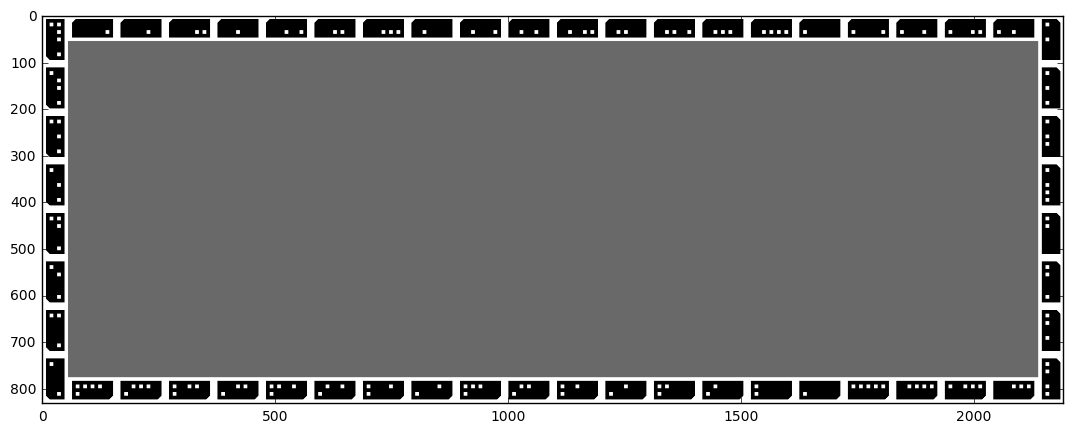

In [3]:
# Leo la cinta
mesa = cv2.imread('imgs/mesa_ideal.png', 0)

plt.figure(figsize=(15, 5))
plt.imshow(mesa, cmap = plt.get_cmap('gray'))

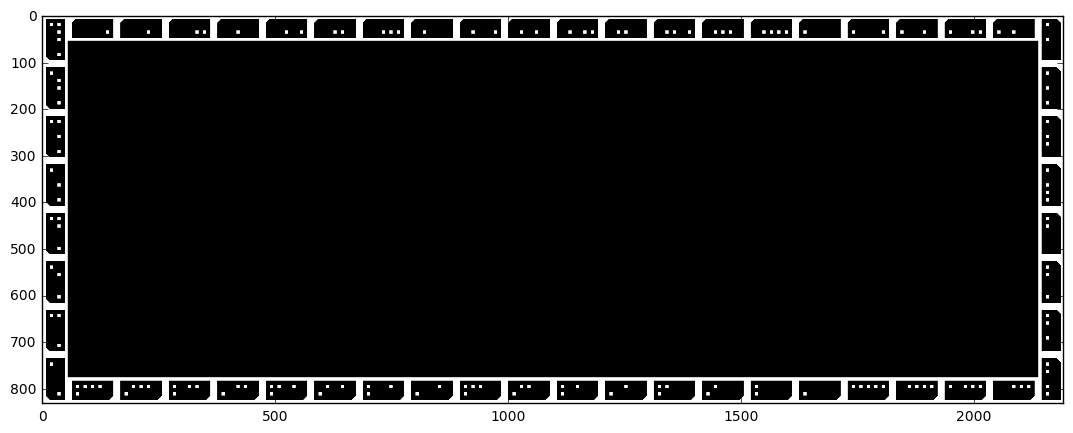

In [4]:
# Paso un threshold
# Esto es util para separar la madera de la cinta
ret, thresh = cv2.threshold(mesa, 250, 255, 0)

plt.figure(figsize=(15, 5))
plt.imshow(thresh, cmap = plt.get_cmap('gray'))

([], <a list of 0 Text yticklabel objects>)

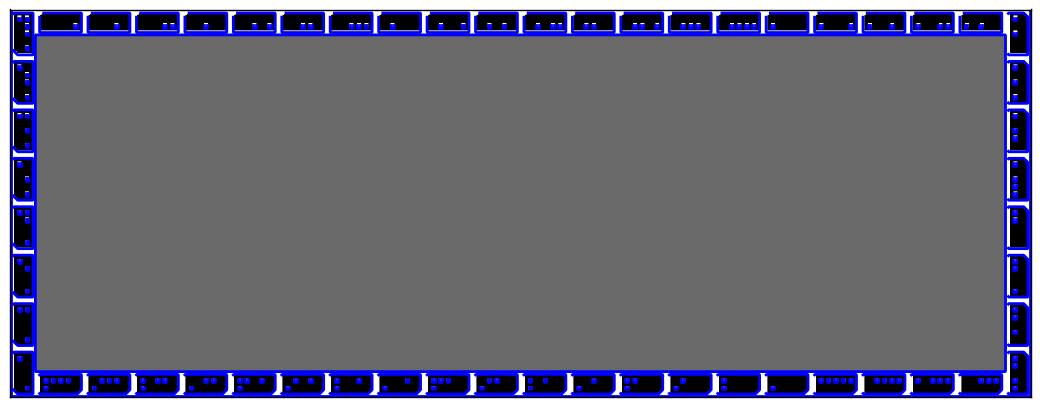

In [5]:
# Encuentro los contornos
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Grafico la imagen y todos los contornos
plt.figure(figsize=(15, 5))
plt.imshow(mesa, interpolation='nearest', cmap=plt.cm.gray)

for contour in contours:    
    plt.plot(contour[:,0, :][:, 0], contour[:,0, :][:, 1], '-b', linewidth=2)

plt.axis('image')
plt.xticks([])
plt.yticks([])

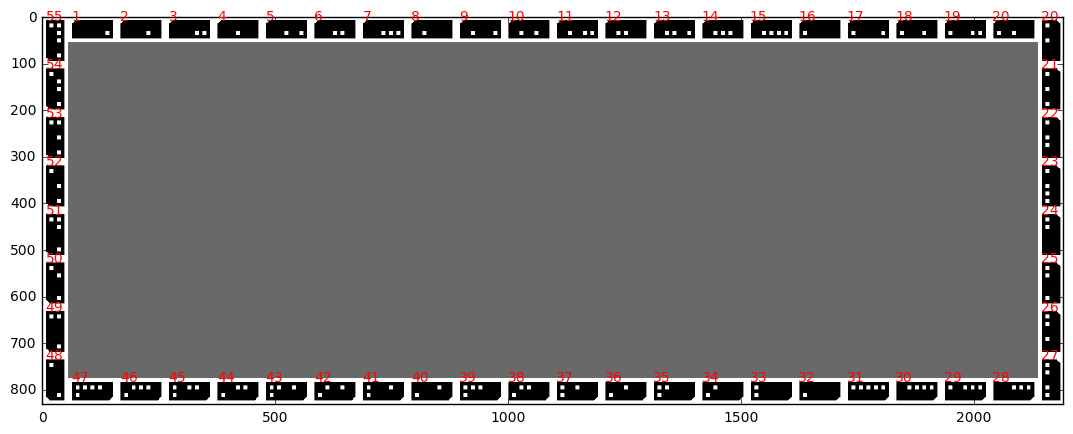

In [6]:
# numero de contorno de todos los rectangulos
rectangles_number = [num for num, val in enumerate(hierarchy[0]) if val[-1] == 0 and val[-2] != -1]

numbers = []

plt.figure(figsize=(15, 5))
plt.imshow(mesa, interpolation='nearest', cmap=plt.cm.gray)

for num in rectangles_number:
    rect = cv2.minAreaRect(contours[num])
    box = cv2.boxPoints(rect)
    
    x_val = [int(min(box[:, 0])), int(max(box[:, 0]))]
    y_val = [int(min(box[:, 1])), int(max(box[:, 1]))]
    
    binario = encoding2binary(mesa[y_val[0]:y_val[1], x_val[0]:x_val[1]], box)
    numbers.append(int(binario, 2))
    
    plt.text(x_val[0], y_val[0], str(int(binario, 2)), color='red')